Question 1

a.

In [1]:
# The Christchurch weather station located in Bottle Lake Forrest (Lat:-43.47028, Long:172.68222) has a station ID of 745fc0710fa09b23617206c0;
# The Auckland weather station located in Great Barrier Island (Lat:-36.2, Long:175.3999872) has a station ID of 902bb57afaa3b1aac10ef19

b.

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr

In [3]:
import rasterio as rs
import scipy.io

In [4]:
print(os.getcwd())

/home/UOCNT/jco166/Assignment_2


In [5]:
Auckland_ds = xr.open_dataset("Auckland_AWS.nc")

In [6]:
Christchurch_ds = xr.open_dataset("Christchurch_AWS.nc")

In [112]:
AWS = Auckland_ds["wind_speed"]
AWD = Auckland_ds["wind_direction"]
AT = Auckland_ds["temperature"]
ARH = Auckland_ds["relative_humidity"]
AP = Auckland_ds["precipitation"]

In [113]:
first_time_AWS = Auckland_ds["wind_speed"].time.values[0]
end_time_AWS = Auckland_ds["wind_speed"].time.values[-1]

first_time_AWD = Auckland_ds["wind_direction"].time.values[0]
end_time_AWD = Auckland_ds["wind_direction"].time.values[-1]

first_time_AT = Auckland_ds["temperature"].time.values[0]
end_time_AT = Auckland_ds["temperature"].time.values[-1]

first_time_ARH = Auckland_ds["relative_humidity"].time.values[0]
end_time_ARH = Auckland_ds["relative_humidity"].time.values[-1]

first_time_AP = Auckland_ds["precipitation"].time.values[0]
end_time_AP = Auckland_ds["precipitation"].time.values[-1]

In [9]:
print(first_time_AWS)
print(end_time_AWS)

print(first_time_AWD)
print(end_time_AWD)

print(first_time_AT)
print(end_time_AT)

print(first_time_ARH)
print(end_time_ARH)

print(first_time_AP)
print(end_time_AP)

2022-05-01T00:00:00.000000000
2023-05-01T00:00:00.000000000
2022-05-01T00:00:00.000000000
2023-05-01T00:00:00.000000000
2022-05-01T00:00:00.000000000
2023-05-01T00:00:00.000000000
2022-05-01T00:00:00.000000000
2023-05-01T00:00:00.000000000
2022-05-01T00:00:00.000000000
2023-05-01T00:00:00.000000000


In [10]:
# Auckland Variable (Start Date; End Date): Wind Speed (2022-05-01T00:00:00.000000000;2023-05-01T00:00:00.000000000); Wind Direction (2022-05-01T00:00:00.000000000;2023-05-01T00:00:00.000000000);
# Temperature (2022-05-01T00:00:00.000000000;2023-05-01T00:00:00.000000000); Relative Humidity (2022-05-01T00:00:00.000000000;2023-05-01T00:00:00.000000000);
# Precipitation (2022-05-01T00:00:00.000000000;2023-05-01T00:00:00.000000000)

In [11]:
Christchurch_ds

<xarray.Dataset>
Dimensions:            (time: 8696)
Coordinates:
    geometry           object ...
    height             float32 ...
  * time               (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Data variables:
    wind_speed         (time) float32 ...
    wind_direction     (time) float32 ...
    temperature        (time) float32 ...
    relative_humidity  (time) float32 ...
    precipitation      (time) float32 ...

In [12]:
CWS = Christchurch_ds["wind_speed"]
CWD = Christchurch_ds["wind_direction"]
CT = Christchurch_ds["temperature"]
CRH = Christchurch_ds["relative_humidity"]
CP = Christchurch_ds["precipitation"]

In [13]:
first_time_CWS = Christchurch_ds["wind_speed"].time.values[0]
end_time_CWS = Christchurch_ds["wind_speed"].time.values[-1]

first_time_CWD = Christchurch_ds["wind_direction"].time.values[0]
end_time_CWD = Christchurch_ds["wind_direction"].time.values[-1]

first_time_CT = Christchurch_ds["temperature"].time.values[0]
end_time_CT = Christchurch_ds["temperature"].time.values[-1]

first_time_CRH = Christchurch_ds["relative_humidity"].time.values[0]
end_time_CRH = Christchurch_ds["relative_humidity"].time.values[-1]

first_time_CP = Christchurch_ds["precipitation"].time.values[0]
end_time_CP = Christchurch_ds["precipitation"].time.values[-1]

In [14]:
print(first_time_CWS)
print(end_time_CWS)

print(first_time_CWD)
print(end_time_CWD)

print(first_time_CT)
print(end_time_CT)

print(first_time_CRH)
print(end_time_CRH)

print(first_time_CP)
print(end_time_CP)

2022-05-01T00:00:00.000000000
2023-04-30T23:00:00.000000000
2022-05-01T00:00:00.000000000
2023-04-30T23:00:00.000000000
2022-05-01T00:00:00.000000000
2023-04-30T23:00:00.000000000
2022-05-01T00:00:00.000000000
2023-04-30T23:00:00.000000000
2022-05-01T00:00:00.000000000
2023-04-30T23:00:00.000000000


In [15]:
# Christchurch Variable (Start Date; End Date): Wind Speed (2022-05-01T00:00:00.000000000;2023-04-30T23:00:00.000000000); Wind Direction (2022-05-01T00:00:00.000000000;2023-04-30T23:00:00.000000000);
# Temperature (2022-05-01T00:00:00.000000000;2023-04-30T23:00:00.000000000); Relative Humidity (2022-05-01T00:00:00.000000000;2023-04-30T23:00:00.000000000);
# Precipitation (2022-05-01T00:00:00.000000000;2023-04-30T23:00:00.000000000)

c.

In [16]:
Auckland_ds["wind_speed"]

<xarray.DataArray 'wind_speed' (time: 8697)>
array([5.78, 5.27, 5.03, ..., 6.48, 6.19, 5.68], dtype=float32)
Coordinates:
    geometry  object ...
    height    float32 ...
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              wind_speed
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             0b2bd62cc42f3096136f11e9
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.01
    block_length:           0.0
    time_interval:          7300
    standard_name:          wind_speed
    dtype:                  int16
    dtype_decoded:          float32

In [17]:
Auckland_ds["wind_direction"]

<xarray.DataArray 'wind_direction' (time: 8697)>
array([60.4, 65.8, 79.9, ..., 35.2, 35.8, 36. ], dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              wind_direction
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             a7561f55ad53ea0647f8ce56
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          wind_from_direction
    dtype:                  int16
    dtype_decoded:          float32

In [18]:
Auckland_ds["wind_direction"]

<xarray.DataArray 'wind_direction' (time: 8697)>
array([60.4, 65.8, 79.9, ..., 35.2, 35.8, 36. ], dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              wind_direction
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             a7561f55ad53ea0647f8ce56
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          wind_from_direction
    dtype:                  int16
    dtype_decoded:          float32

In [19]:
Auckland_ds["temperature"]

<xarray.DataArray 'temperature' (time: 8697)>
array([19.7     , 20.2     , 19.300001, ..., 19.9     , 20.      , 19.9     ],
      dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

In [20]:
Auckland_ds["relative_humidity"]

<xarray.DataArray 'relative_humidity' (time: 8697)>
array([70.9     , 66.8     , 69.200005, ..., 97.9     , 97.      , 97.200005],
      dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              relative_humidity
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             11de048221534727a01eee26
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          relative_humidity
    dtype:                  int16
    dtype_decoded:          float32

In [21]:
Auckland_ds["precipitation"]

<xarray.DataArray 'precipitation' (time: 8697)>
array([0. , 0. , 0. , ..., 0.5, 0. , 1. ], dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              precipitation
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  cumulative
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             c5f55d97e71e7cd73295ad7f
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          precipitation_amount
    dtype:                  int16
    dtype_decoded:          float32

In [22]:
Christchurch_ds["wind_speed"]

<xarray.DataArray 'wind_speed' (time: 8696)>
array([1.88, 2.21, 0.97, ..., 0.82, 1.23, 0.92], dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              wind_speed
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             0b2bd62cc42f3096136f11e9
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.01
    block_length:           0.0
    time_interval:          7300
    standard_name:          wind_speed
    dtype:                  int16
    dtype_decoded:          float32

In [23]:
Christchurch_ds["wind_direction"]

<xarray.DataArray 'wind_direction' (time: 8696)>
array([301.7    , 311.80002, 278.     , ..., 248.8    , 292.30002, 268.7    ],
      dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              wind_direction
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             a7561f55ad53ea0647f8ce56
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          wind_from_direction
    dtype:                  int16
    dtype_decoded:          float32

In [24]:
Christchurch_ds["temperature"]

<xarray.DataArray 'temperature' (time: 8696)>
array([24.2     , 23.2     , 21.7     , ..., 12.900001, 15.8     , 16.      ],
      dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

In [25]:
Christchurch_ds["relative_humidity"]

<xarray.DataArray 'relative_humidity' (time: 8696)>
array([38.8     , 37.8     , 46.8     , ..., 93.200005, 81.8     , 83.200005],
      dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              relative_humidity
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             11de048221534727a01eee26
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          relative_humidity
    dtype:                  int16
    dtype_decoded:          float32

In [26]:
Christchurch_ds["precipitation"]

<xarray.DataArray 'precipitation' (time: 8696)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              precipitation
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  cumulative
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             c5f55d97e71e7cd73295ad7f
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          precipitation_amount
    dtype:                  int16
    dtype_decoded:          float32

In [27]:
print(Auckland_ds.wind_direction.size)
print(Auckland_ds.wind_direction.time[0])
print(Auckland_ds.wind_direction.time[8695])

8697
<xarray.DataArray 'time' ()>
array('2022-05-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
    time      datetime64[ns] 2022-05-01
Attributes:
    DIMENSION_LABELS:  time
    dtype:             int64
    dtype_decoded:     datetime64[s]
<xarray.DataArray 'time' ()>
array('2023-04-30T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
    time      datetime64[ns] 2023-04-30T23:00:00
Attributes:
    DIMENSION_LABELS:  time
    dtype:             int64
    dtype_decoded:     datetime64[s]


In [28]:
Auckland_ds

<xarray.Dataset>
Dimensions:            (time: 8697)
Coordinates:
    geometry           <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height             float32 2.0
  * time               (time) datetime64[ns] 2022-05-01 ... 2023-05-01
Data variables:
    wind_speed         (time) float32 5.78 5.27 5.03 3.96 ... 6.48 6.19 5.68
    wind_direction     (time) float32 60.4 65.8 79.9 87.2 ... 35.2 35.8 36.0
    temperature        (time) float32 19.7 20.2 19.3 19.3 ... 19.9 20.0 19.9
    relative_humidity  (time) float32 70.9 66.8 69.2 69.9 ... 97.9 97.0 97.2
    precipitation      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 1.5 0.5 0.0 1.0

In [29]:
Christchurch_ds

<xarray.Dataset>
Dimensions:            (time: 8696)
Coordinates:
    geometry           <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height             float32 2.0
  * time               (time) datetime64[ns] 2022-05-01 ... 2023-04-30T23:00:00
Data variables:
    wind_speed         (time) float32 1.88 2.21 0.97 1.08 ... 0.6 0.82 1.23 0.92
    wind_direction     (time) float32 301.7 311.8 278.0 ... 248.8 292.3 268.7
    temperature        (time) float32 24.2 23.2 21.7 19.0 ... 12.9 15.8 16.0
    relative_humidity  (time) float32 38.8 37.8 46.8 64.3 ... 93.2 81.8 83.2
    precipitation      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [30]:
# Variable (Unit;Frequency):
# Wind Speed (m/s;Hourly)
# Wind Direction (Degrees);Hourly)
# Temperature (Celsius;Hourly)
# Relative Humidity (Percentage;Hourly)
# Precipitation (Millimetres;Hourly)

d.

In [31]:
AWS_mean = AWS.mean()
AT_mean = AT.mean()
ARH_mean = ARH.mean()

In [32]:
print(AWS_mean)

<xarray.DataArray 'wind_speed' ()>
array(4.165086, dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0


In [33]:
print(AT_mean)

<xarray.DataArray 'temperature' ()>
array(16.401772, dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0


In [34]:
print(ARH_mean)

<xarray.DataArray 'relative_humidity' ()>
array(81.22654, dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0


In [35]:
# Auckland Variable (Mean):
# Wind Speed (4.165086);
# Temperature (16.401772);
# Relative Humidity (81.22654)

In [36]:
CWS_mean = CWS.mean()
CT_mean = CT.mean()
CRH_mean = CRH.mean()

In [37]:
print(CWS_mean)

<xarray.DataArray 'wind_speed' ()>
array(1.6682014, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0


In [38]:
print(CT_mean)

<xarray.DataArray 'temperature' ()>
array(12.254819, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0


In [39]:
print(CRH_mean)

<xarray.DataArray 'relative_humidity' ()>
array(81.95283, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0


In [40]:
# Christchurch Variable (Mean):
# Wind Speed (1.6682014);
# Temperature (12.254819);
# Relative Humidity (81.95283)

e.

In [41]:
AP_sum = AP.sum()

In [42]:
print(AP_sum)

<xarray.DataArray 'precipitation' ()>
array(2427., dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0


In [43]:
# Auckland Total Precipitation: 2,427mm

In [44]:
CP_sum = CP.sum()

In [45]:
print(CP_sum)

<xarray.DataArray 'precipitation' ()>
array(762.8, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0


In [46]:
# Christchurch Total Precipitation: 762.8mm

Question 2

a.

Text(0.5, 1.0, 'Auckland Yearly Wind Direction')

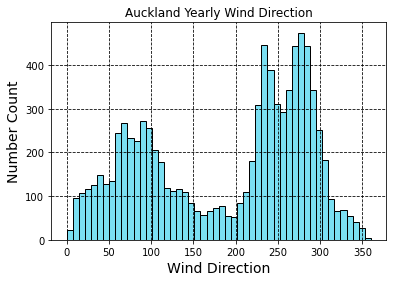

In [47]:
# Auckland Yearly Wind Direction
plt.hist(AWD, bins=50, edgecolor="black", facecolor="#7bdff2", range=(0, 360))
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Wind Direction", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Auckland Yearly Wind Direction")

Text(0.5, 1.0, 'Auckland Yearly Wind Speed')

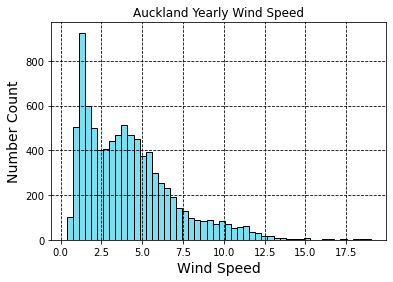

In [48]:
# Auckland Yearly Wind Speed
plt.hist(AWS, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Wind Speed", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Auckland Yearly Wind Speed")

Text(0.5, 1.0, 'Auckland Yearly Air Temperature')

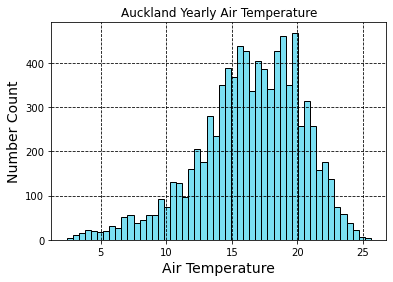

In [49]:
# Auckland Yearly Air Temperature
plt.hist(AT, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Air Temperature", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Auckland Yearly Air Temperature")

Text(0.5, 1.0, 'Auckland Yearly Relative Humidity')

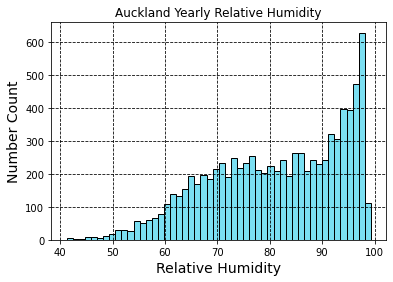

In [50]:
# Auckland Yearly Relative Humidity
plt.hist(ARH, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Relative Humidity", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Auckland Yearly Relative Humidity")

Text(0.5, 1.0, 'Auckland Yearly Precipitation')

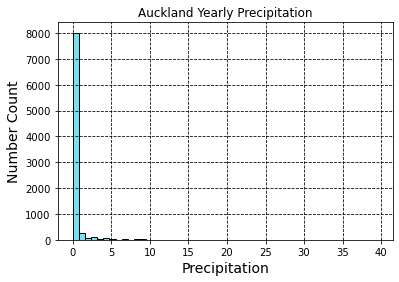

In [51]:
# Auckland Yearly Precipitation
plt.hist(AP, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Precipitation", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Auckland Yearly Precipitation")

Text(0.5, 1.0, 'Christchurch Yearly Wind Direction')

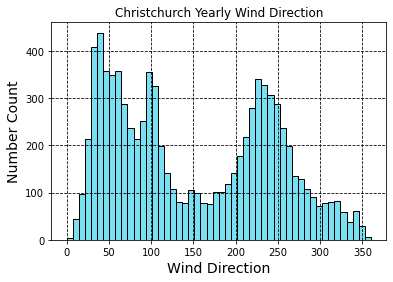

In [52]:
# Christchurch Yearly Wind Direction
plt.hist(CWD, bins=50, edgecolor="black", facecolor="#7bdff2", range=(0, 360))
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Wind Direction", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Christchurch Yearly Wind Direction")

Text(0.5, 1.0, 'Chrsitchurch Yearly Wind Speed')

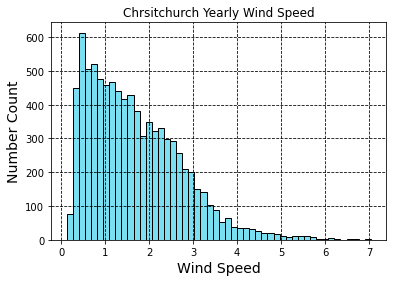

In [53]:
# Christchurch Yearly Wind Speed
plt.hist(CWS, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Wind Speed", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Chrsitchurch Yearly Wind Speed")

Text(0.5, 1.0, 'Christchurch Yearly Air Temperature')

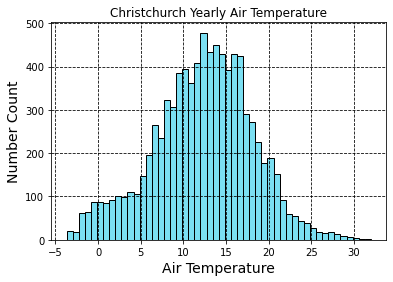

In [54]:
# Christchurch Yearly Air Temperature
plt.hist(CT, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Air Temperature", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Christchurch Yearly Air Temperature")

Text(0.5, 1.0, 'Christchurch Yearly Relative Humidity')

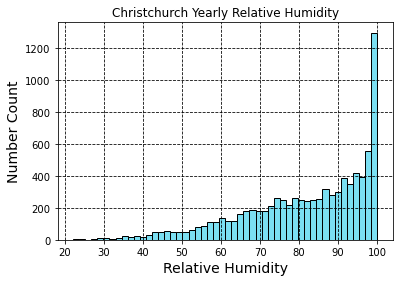

In [55]:
# Christchurch Yearly Relative Humidity
plt.hist(CRH, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Relative Humidity", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Christchurch Yearly Relative Humidity")

Text(0.5, 1.0, 'Christchurch Yearly Precipitation')

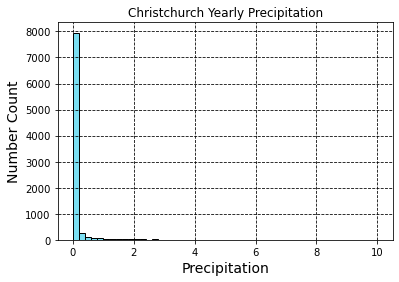

In [56]:
# Chrsitchurch Yearly Precipitation
plt.hist(CP, bins=50, edgecolor="black", facecolor="#7bdff2")
plt.grid(which="both", linestyle="dashed", color="black")
plt.xlabel("Precipitation", fontsize=14)
plt.ylabel("Number Count", fontsize=14)
plt.title("Christchurch Yearly Precipitation")

In [57]:
AWS_grp_mth = Auckland_ds.wind_speed.groupby("time.month")
AWD_grp_mth = Auckland_ds.wind_direction.groupby("time.month")
AT_grp_mth = Auckland_ds.temperature.groupby("time.month")
ARH_grp_mth = Auckland_ds.relative_humidity.groupby("time.month")
AP_grp_mth = Auckland_ds.precipitation.groupby("time.month")

In [58]:
CWS_grp_mth = Christchurch_ds.wind_speed.groupby("time.month")
CWD_grp_mth = Christchurch_ds.wind_direction.groupby("time.month")
CT_grp_mth = Christchurch_ds.temperature.groupby("time.month")
CRH_grp_mth = Christchurch_ds.relative_humidity.groupby("time.month")
CP_grp_mth = Christchurch_ds.precipitation.groupby("time.month")

b.

In [59]:
# Calculating the Mean and Grouping Auckland Wind Speed and Temperature
AWS_grp_hrly = Auckland_ds.wind_speed.groupby("time.hour").mean(dim="time")
AT_grp_hrly = Auckland_ds.temperature.groupby("time.hour").mean(dim="time")

In [60]:
# Extracted Auckland Hour Values and Mean Wind Speed
AWS_grp_hrly_val = AWS_grp_hrly.hour
AWS_grp_hrly_mean = AWS_grp_hrly.values

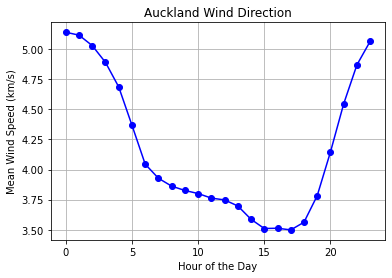

In [61]:
plt.plot(AWS_grp_hrly_val, AWS_grp_hrly_mean, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Wind Speed (km/s)")
plt.title("Auckland Wind Direction")

# Display
plt.grid(True)
plt.show()

In [62]:
# Extracted Auckland Hour Values and Mean Temperatures
AT_grp_hrly_val = AT_grp_hrly.hour
AT_grp_hrly_mean = AT_grp_hrly.values

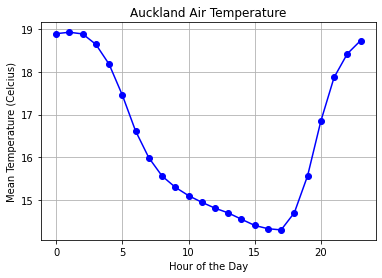

In [63]:
plt.plot(AT_grp_hrly_val, AT_grp_hrly_mean, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Temperature (Celcius)")
plt.title("Auckland Air Temperature")

# Display
plt.grid(True)
plt.show()

In [64]:
# Calculating the Mean and Grouping Christchurch Wind Speed and Temperature
CWS_grp_hrly = Christchurch_ds.wind_speed.groupby("time.hour").mean(dim="time")
CT_grp_hrly = Christchurch_ds.temperature.groupby("time.hour").mean(dim="time")

In [65]:
# Extracted Christchurch Hour Values and Mean Wind Speed
CWS_grp_hrly_val = CWS_grp_hrly.hour
CWS_grp_hrly_mean = CWS_grp_hrly.values

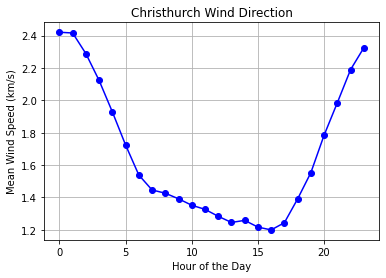

In [66]:
plt.plot(CWS_grp_hrly_val, CWS_grp_hrly_mean, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Wind Speed (m/s)")
plt.title("Christhurch Wind Direction")

# Display
plt.grid(True)
plt.show()

In [67]:
# Extracted Auckland Hour Values and Mean Temperatures
CT_grp_hrly_val = CT_grp_hrly.hour
CT_grp_hrly_mean = CT_grp_hrly.values

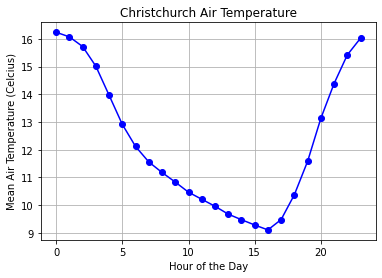

In [68]:
plt.plot(CT_grp_hrly_val, CT_grp_hrly_mean, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Air Temperature (Celcius)")
plt.title("Christchurch Air Temperature")

# Display
plt.grid(True)
plt.show()

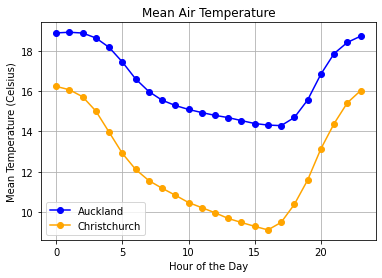

In [69]:
# Air Temperatures for both Auckland and Christchurch

# Creating the Plot
plt.plot(
    AT_grp_hrly_val,
    AT_grp_hrly_mean,
    marker="o",
    linestyle="-",
    color="blue",
    label="Auckland",
)
plt.plot(
    CT_grp_hrly_val,
    CT_grp_hrly_mean,
    marker="o",
    linestyle="-",
    color="orange",
    label="Christchurch",
)

# Add Labels and a Title
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Temperature (Celsius)")
plt.title("Mean Air Temperature")

# Adding a Legend to Identify Each Line
plt.legend()

# Display the Plot
plt.grid(True)
plt.show()

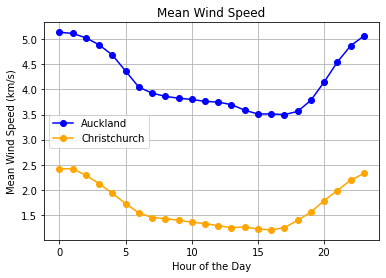

In [70]:
# Wind Speed for both Auckland and Christchurch

# Creating the Plot
plt.plot(
    AWS_grp_hrly_val,
    AWS_grp_hrly_mean,
    marker="o",
    linestyle="-",
    color="blue",
    label="Auckland",
)
plt.plot(
    CWS_grp_hrly_val,
    CWS_grp_hrly_mean,
    marker="o",
    linestyle="-",
    color="orange",
    label="Christchurch",
)

# Add Labels and a Title
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Wind Speed (km/s)")
plt.title("Mean Wind Speed")

# Adding a Legend to Identify Each Line
plt.legend()

# Display the Plot
plt.grid(True)
plt.show()

Question 3

a.

In [98]:
np_AT = AT.to_masked_array()
np_CT = CT.to_masked_array()

np_Auckland_ds = Auckland_ds.to_array()
np_Christchurch_ds = Christchurch_ds.to_array()

In [72]:
# Auckland 0.25 Percentile for Air Temerature

In [108]:
Auckland_Lower = np.percentile(Auckland_ds.temperature, 0.25)
print(Auckland_ds.temperature[np.where(np_AT < Auckland_Lower)])
print(Auckland_ds.time[np.where(np_AT < Auckland_Lower)])

<xarray.DataArray 'temperature' (time: 20)>
array([3.4, 3.2, 3.4, 3. , 2.5, 2.4, 2.9, 3.4, 3.1, 3.3, 3.4, 3.2, 2.8, 2.9,
       3.1, 3. , 3.3, 3.3, 3.4, 2.8], dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-07-17T12:00:00 ... 2022-10-06T17:00:00
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
   

In [74]:
# Auckland 99.75 Percentile for Air Temperature

In [109]:
Auckland_Higher = np.percentile(Auckland_ds.temperature, 99.75)
print(Auckland_ds.temperature[np.where(np_AT > Auckland_Higher)])
print(Auckland_ds.time[np.where(np_AT > Auckland_Higher)])

<xarray.DataArray 'temperature' (time: 15)>
array([24.800001, 24.6     , 24.800001, 24.800001, 24.5     , 25.4     ,
       25.6     , 25.2     , 24.5     , 24.6     , 24.9     , 24.5     ,
       25.      , 24.9     , 24.5     ], dtype=float32)
Coordinates:
    geometry  <U42 '010100000030815B77F3EE6540FA9B5088801F42C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-12-22 ... 2023-03-17T01:00:00
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    

In [76]:
# Christchurch 0.25 Percentile for Air Temperature

In [110]:
Christchurch_Lower = np.percentile(Christchurch_ds.temperature, 0.25)
print(Christchurch_ds.temperature[np.where(np_CT < Christchurch_Lower)])
print(Christchurch_ds.time[np.where(np_CT < Christchurch_Lower)])

<xarray.DataArray 'temperature' (time: 21)>
array([-3. , -3.4, -3.7, -3.2, -3.2, -3.6, -3.1, -3.1, -3. , -3. , -3. , -3.3,
       -3.4, -3.5, -3.5, -3. , -3.1, -3.4, -3.5, -3.6, -3.4], dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-06-21T16:00:00 ... 2022-09-06T18:00:00
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block

In [78]:
# Christchurch 99.75 Percentile for Air Temperature

In [111]:
Christchurch_Higher = np.percentile(Christchurch_ds.temperature, 99.75)
print(Christchurch_ds.temperature[np.where(np_CT > Christchurch_Higher)])
print(Christchurch_ds.time[np.where(np_CT > Christchurch_Higher)])

<xarray.DataArray 'temperature' (time: 22)>
array([29.2     , 28.800001, 28.9     , 28.800001, 28.800001, 30.2     ,
       28.7     , 29.      , 30.800001, 32.      , 29.2     , 29.7     ,
       31.1     , 30.4     , 28.5     , 28.5     , 29.300001, 30.1     ,
       30.300001, 29.300001, 29.9     , 29.4     ], dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 2022-11-02 ... 2023-02-20T23:00:00
Attributes:
    DIMENSION_LABELS:       ['time', 'geometry', 'height']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attrib

In [80]:
# Auckland Variable (0.25; 99.75):
# Auckland Air Temperature (Celsius) (3.4, 3.2, 3.4, 3. , 2.5, 2.4, 2.9, 3.4, 3.1, 3.3, 3.4, 3.2, 2.8, 2.9,
# 3.1, 3. , 3.3, 3.3, 3.4, 2.8;24.800001, 24.6, 24.800001, 24.800001, 24.5, 25.4, 25.6, 25.2, 24.5,
# 24.6, 24.9, 24.5, 25, 24.9, 24.5)

# Auckland Respective Times and Dates for Air Temperature Values ('2022-07-17T12:00:00.000000000', '2022-07-17T13:00:00.000000000',
# '2022-07-17T14:00:00.000000000', '2022-08-11T16:00:00.000000000',
# '2022-08-11T17:00:00.000000000', '2022-08-11T18:00:00.000000000',
# '2022-08-11T19:00:00.000000000', '2022-08-13T17:00:00.000000000',
# '2022-08-13T18:00:00.000000000', '2022-09-01T14:00:00.000000000',
# '2022-09-01T15:00:00.000000000', '2022-09-06T09:00:00.000000000',
# '2022-09-06T10:00:00.000000000', '2022-09-06T11:00:00.000000000',
# '2022-09-06T12:00:00.000000000', '2022-09-06T13:00:00.000000000',
# '2022-09-06T14:00:00.000000000', '2022-09-06T18:00:00.000000000',
# '2022-10-06T16:00:00.000000000', '2022-10-06T17:00:00.000000000';'2022-07-17T12:00:00.000000000', '2022-07-17T13:00:00.000000000',
# '2022-07-17T14:00:00.000000000', '2022-08-11T16:00:00.000000000',
# '2022-08-11T17:00:00.000000000', '2022-08-11T18:00:00.000000000',
# '2022-08-11T19:00:00.000000000', '2022-08-13T17:00:00.000000000',
# '2022-08-13T18:00:00.000000000', '2022-09-01T14:00:00.000000000',
# '2022-09-01T15:00:00.000000000', '2022-09-06T09:00:00.000000000',
# '2022-09-06T10:00:00.000000000', '2022-09-06T11:00:00.000000000',
# '2022-09-06T12:00:00.000000000', '2022-09-06T13:00:00.000000000',
# '2022-09-06T14:00:00.000000000', '2022-09-06T18:00:00.000000000',
# '2022-10-06T16:00:00.000000000', '2022-10-06T17:00:00.000000000')


# Christchurch Variable (0.25; 99.75):
# Christchurch Air Temperature (Celsius) (-3, -3.4, -3.7, -3.2, -3.2, -3.6, -3.1, -3.1, -3, -3, -3, -3.3,
# -3.4, -3.5, -3.5, -3. , -3.1, -3.4, -3.5, -3.6, -3.4; 29.2, 28.800001, 28.9, 28.800001, 28.800001, 30.2,
# 28.7, 29, 30.800001, 32, 29.2, 29.7, 31.1, 30.4, 28.5, 28.5, 29.300001, 30.1, 30.300001, 29.300001, 29.9, 29.4)

# Christchurch Respective Times and Dates for Air Temperature Values ('2022-06-21T16:00:00.000000000', '2022-06-21T17:00:00.000000000',
# '2022-06-21T18:00:00.000000000', '2022-06-21T19:00:00.000000000',
# '2022-06-22T17:00:00.000000000', '2022-06-22T18:00:00.000000000',
# '2022-06-22T19:00:00.000000000', '2022-07-16T17:00:00.000000000',
# '2022-07-16T18:00:00.000000000', '2022-08-09T17:00:00.000000000',
# '2022-08-09T18:00:00.000000000', '2022-08-11T17:00:00.000000000',
# '2022-08-11T18:00:00.000000000', '2022-08-13T17:00:00.000000000',
# '2022-08-13T18:00:00.000000000', '2022-09-06T13:00:00.000000000',
# '2022-09-06T14:00:00.000000000', '2022-09-06T15:00:00.000000000',
# '2022-09-06T16:00:00.000000000', '2022-09-06T17:00:00.000000000',
# '2022-09-06T18:00:00.000000000'; '2022-11-02T00:00:00.000000000', '2022-11-02T01:00:00.000000000',
# '2023-02-01T23:00:00.000000000', '2023-02-02T01:00:00.000000000',
# '2023-02-02T23:00:00.000000000', '2023-02-03T00:00:00.000000000',
# '2023-02-03T01:00:00.000000000', '2023-02-03T03:00:00.000000000',
# '2023-02-03T04:00:00.000000000', '2023-02-03T05:00:00.000000000',
# '2023-02-03T20:00:00.000000000', '2023-02-03T21:00:00.000000000',
# '2023-02-03T22:00:00.000000000', '2023-02-03T23:00:00.000000000',
# '2023-02-04T00:00:00.000000000', '2023-02-05T22:00:00.000000000',
# '2023-02-05T23:00:00.000000000', '2023-02-06T00:00:00.000000000',
# '2023-02-06T01:00:00.000000000', '2023-02-06T02:00:00.000000000',
# '2023-02-20T22:00:00.000000000', '2023-02-20T23:00:00.000000000')